# Import Libraries

In [1]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

## Job Posts

In [2]:
df_jobs = pd.read_excel('job_listings_query_result_2024-11-04T05_58_13.074135Z.xlsx')
df_jobs

,ID,Title,Description,Job Summary,Created At,Updated At,Search,Anonymous,Slug,Industries → Industry
0,290,Merchandising Development Executive,<p><b>Responsibility</b></p><p>&#8226;&#9;Mana...,Merchandising Development Executive,2022-12-15T11:22:16Z,2023-03-24T10:07:17Z,NaN,0,merchandising-development-executive-290,Law & Compliance
1,1986,Sales Representative (24 Posts),"<span style=""text-decoration: underline;""><str...",Sales Representative (24 Posts),2022-12-15T11:22:16Z,2023-03-24T10:07:17Z,NaN,0,sales-representative-24-posts-1986,Law & Compliance
2,1998,Depot Manager (3 Posts),"<p><strong><span style=""text-decoration: under...",Depot Manager (3 Posts),2022-12-15T11:22:16Z,2023-03-24T10:07:17Z,NaN,0,depot-manager-3-posts-1998,Law & Compliance
3,2001,Driver (1 Posts),"<p><strong><span style=""text-decoration: under...",Driver (1 Posts),2022-12-15T11:22:16Z,2023-03-24T10:07:15Z,NaN,0,driver-1-posts-2001,"Travel ,Tourism & Transportation"
4,2088,Driver,<p>-အသက္ ၂၅ မွ ၄၀&nbsp;ႏွစ္အတြင္းျဖစ္ရမည္။<br>...,Driver,2021-02-02T05:02:14Z,2023-03-24T10:07:15Z,NaN,0,driver-2088,IT & Telecom
...,...,...,...,...,...,...,...,...,...,...
7111,78004,Regulatory Executive,<strong>Job Requirements</strong><br />\n<ul>\...,<ul>\n<li>English စာတတ်ကျွမ်း၍ နိုင်ငံတကာ ဆက်သ...,2023-12-22T10:55:40Z,2024-02-06T07:49:05Z,ITM Group of companies Myanmar Yangon Yangon R...,0,regulatory-executive-78004,Medical & Healthcare
7112,78005,Branch Officer,<strong>Job Requirements</strong><br />\n<ul>\...,<ul>\n<li>အထွေထွေစီမံခန့်ခွဲမှုနှင့် ရောင်းချဖ...,2023-12-22T11:06:46Z,2024-01-25T01:56:18Z,ITM Group of companies Myanmar Yangon Yangon B...,0,branch-officer-78005,Manufacturing & Warehousing
7113,78006,Assistant Executive Housekeeper,<ul>\n<li>Assigns schedules and duties to Hous...,Minimum 2 years in related fields<br />Supervi...,2023-12-22T11:33:18Z,2024-01-11T04:51:01Z,Sedona Hotels Myanmar Yangon Yangon Assistant ...,0,assistant-executive-housekeeper-78006,Hospitality & Hotel
7114,78007,Executive Secretary,"<h2 class=""cs8D95151C""><span class=""cs1611372C...",<ul>\n<li>Prepare confidential and sensitive d...,2023-12-22T11:54:57Z,2024-01-11T04:50:30Z,Sedona Hotels Myanmar Yangon Yangon Executive ...,0,executive-secretary-78007,Hospitality & Hotel


In [3]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116 entries, 0 to 7115
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     7116 non-null   int64 
 1   Title                  7116 non-null   object
 2   Description            7116 non-null   object
 3   Job Summary            7116 non-null   object
 4   Created At             7116 non-null   object
 5   Updated At             7116 non-null   object
 6   Search                 1173 non-null   object
 7   Anonymous              7116 non-null   int64 
 8   Slug                   7116 non-null   object
 9   Industries → Industry  7116 non-null   object
dtypes: int64(2), object(8)
memory usage: 556.1+ KB


In [4]:
df_jobs.ID.duplicated().sum()

0

In [5]:
df_jobs.Title.duplicated().sum()

1862

In [6]:
df_jobs['Industries → Industry'].duplicated().sum()

7090

## Job Skills

In [7]:
df_skills = pd.read_excel('query_result_2024-11-06T06_52_11.841439Z.xlsx')
df_skills

,Job ID,Job Skill ID,Job Skills → Job Skill
0,77225,1,General management
1,77429,1,General management
2,77605,1,General management
3,77670,1,General management
4,78013,1,General management
...,...,...,...
3804,78411,22471,"Time Management , Recruiting"
3805,78421,22622,"Public Health, HIV, TB, Malaria"
3806,78379,23030,Fluency in English and Burmese
3807,78416,23547,Strong leadership skills.


In [8]:
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job ID                  3809 non-null   int64 
 1   Job Skill ID            3809 non-null   int64 
 2   Job Skills → Job Skill  3809 non-null   object
dtypes: int64(2), object(1)
memory usage: 89.4+ KB


In [9]:
df_skills['Job ID'].duplicated().sum()

2219

In [10]:
df_skills['Job Skill ID'].duplicated().sum()

2323

In [11]:
df_skills['Job Skills → Job Skill'].duplicated().sum()

2325

In [12]:
df_jobs = df_jobs.filter(['ID', 'Title', 'Industries → Industry'], axis=1)
df_jobs.columns = ['ID', 'Title', 'Industries']
df_jobs

,ID,Title,Industries
0,290,Merchandising Development Executive,Law & Compliance
1,1986,Sales Representative (24 Posts),Law & Compliance
2,1998,Depot Manager (3 Posts),Law & Compliance
3,2001,Driver (1 Posts),"Travel ,Tourism & Transportation"
4,2088,Driver,IT & Telecom
...,...,...,...
7111,78004,Regulatory Executive,Medical & Healthcare
7112,78005,Branch Officer,Manufacturing & Warehousing
7113,78006,Assistant Executive Housekeeper,Hospitality & Hotel
7114,78007,Executive Secretary,Hospitality & Hotel


In [13]:
df_skills.columns = ['ID', 'Job Skill ID', 'Job Skills']
df_skills

,ID,Job Skill ID,Job Skills
0,77225,1,General management
1,77429,1,General management
2,77605,1,General management
3,77670,1,General management
4,78013,1,General management
...,...,...,...
3804,78411,22471,"Time Management , Recruiting"
3805,78421,22622,"Public Health, HIV, TB, Malaria"
3806,78379,23030,Fluency in English and Burmese
3807,78416,23547,Strong leadership skills.


In [14]:
len(df_skills['Job Skills'].unique())

1484

In [15]:
df_skills[df_skills['ID'] == 78004]

,ID,Job Skill ID,Job Skills
2721,78004,23593,Proactive and teamwork skills


In [16]:
df_jobs[df_jobs['ID'] == 78004]

,ID,Title,Industries
7111,78004,Regulatory Executive,Medical & Healthcare


In [17]:
df_skills['Job Skills'].value_counts()

Proactive and teamwork skills      116
Teamwork & communication skills     92
Communication Skills                73
Teamwork and collaboration          43
Finance & Accounting Field          42
                                  ... 
ModernTrade                          1
Payment                              1
HR Administration                    1
Adobe Audition                       1
MS offices , Google Suites           1
Name: Job Skills, Length: 1484, dtype: int64

In [18]:
df_jobs['Industries'].value_counts()

NGO, NPO & Charity                     1546
Retail, Fashion & FMCG                  860
Manufacturing & Warehousing             820
IT & Telecom                            692
Education & Training                    425
Construction & Engineering              409
Medical & Healthcare                    376
Agriculture                             310
Energy & Utilities                      287
Shipping & Logistics                    266
Banking, Micro-finance & Insurance      242
Hospitality & Hotel                     197
Automotive & Aviation                   172
Advertising, Media & Communications     171
Property & Real Estate                   66
Recruitment                              62
Law & Compliance                         50
Food & Beverages                         45
Travel ,Tourism & Transportation         42
Entertainment & Events                   34
Government & Public Relations            17
Advisory and Financial Services           8
Mining, Metal & Chemicals       

# Feature Selection

In [19]:
df = pd.merge(df_jobs, df_skills, on='ID')
df

,ID,Title,Industries,Job Skill ID,Job Skills
0,3857,"MEDICAL PRODUCT SPECIALISTS - Pathein , Mawla...",Medical & Healthcare,9558,1. Management Skill
1,22551,Assistant Sales Manager,"Retail, Fashion & FMCG",23593,Proactive and teamwork skills
2,22551,Assistant Sales Manager,"Retail, Fashion & FMCG",23601,Proficient Problem Solving
3,22551,Assistant Sales Manager,"Retail, Fashion & FMCG",23654,"Microsoft word , excel and Powe"
4,22551,Assistant Sales Manager,"Retail, Fashion & FMCG",23658,"interpersonal skills,"
...,...,...,...,...,...
2726,78008,Digital Sale & Marketing,Education & Training,19413,Contents Creation
2727,78008,Digital Sale & Marketing,Education & Training,20191,Content writing skills
2728,78008,Digital Sale & Marketing,Education & Training,21541,Sale & Marketing/Management
2729,78008,Digital Sale & Marketing,Education & Training,21714,Sales & marketing and customer


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2731 entries, 0 to 2730
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            2731 non-null   int64 
 1   Title         2731 non-null   object
 2   Industries    2731 non-null   object
 3   Job Skill ID  2731 non-null   int64 
 4   Job Skills    2731 non-null   object
dtypes: int64(2), object(3)
memory usage: 128.0+ KB


In [21]:
df.Title.duplicated().sum()

1841

In [22]:
df = df.filter(['Title', 'Industries', 'Job Skills'])
df

,Title,Industries,Job Skills
0,"MEDICAL PRODUCT SPECIALISTS - Pathein , Mawla...",Medical & Healthcare,1. Management Skill
1,Assistant Sales Manager,"Retail, Fashion & FMCG",Proactive and teamwork skills
2,Assistant Sales Manager,"Retail, Fashion & FMCG",Proficient Problem Solving
3,Assistant Sales Manager,"Retail, Fashion & FMCG","Microsoft word , excel and Powe"
4,Assistant Sales Manager,"Retail, Fashion & FMCG","interpersonal skills,"
...,...,...,...
2726,Digital Sale & Marketing,Education & Training,Contents Creation
2727,Digital Sale & Marketing,Education & Training,Content writing skills
2728,Digital Sale & Marketing,Education & Training,Sale & Marketing/Management
2729,Digital Sale & Marketing,Education & Training,Sales & marketing and customer


In [23]:
df['Title'] = df.Title.apply(lambda x: ' '.join(re.findall(r'[a-zA-Z]+', x)))
df

,Title,Industries,Job Skills
0,MEDICAL PRODUCT SPECIALISTS Pathein Mawlamyine...,Medical & Healthcare,1. Management Skill
1,Assistant Sales Manager,"Retail, Fashion & FMCG",Proactive and teamwork skills
2,Assistant Sales Manager,"Retail, Fashion & FMCG",Proficient Problem Solving
3,Assistant Sales Manager,"Retail, Fashion & FMCG","Microsoft word , excel and Powe"
4,Assistant Sales Manager,"Retail, Fashion & FMCG","interpersonal skills,"
...,...,...,...
2726,Digital Sale Marketing,Education & Training,Contents Creation
2727,Digital Sale Marketing,Education & Training,Content writing skills
2728,Digital Sale Marketing,Education & Training,Sale & Marketing/Management
2729,Digital Sale Marketing,Education & Training,Sales & marketing and customer


In [24]:
df['Industries'] = df.Industries.apply(lambda x: ' '.join(re.findall(r'[a-zA-Z]+', x)))
df

,Title,Industries,Job Skills
0,MEDICAL PRODUCT SPECIALISTS Pathein Mawlamyine...,Medical Healthcare,1. Management Skill
1,Assistant Sales Manager,Retail Fashion FMCG,Proactive and teamwork skills
2,Assistant Sales Manager,Retail Fashion FMCG,Proficient Problem Solving
3,Assistant Sales Manager,Retail Fashion FMCG,"Microsoft word , excel and Powe"
4,Assistant Sales Manager,Retail Fashion FMCG,"interpersonal skills,"
...,...,...,...
2726,Digital Sale Marketing,Education Training,Contents Creation
2727,Digital Sale Marketing,Education Training,Content writing skills
2728,Digital Sale Marketing,Education Training,Sale & Marketing/Management
2729,Digital Sale Marketing,Education Training,Sales & marketing and customer


In [25]:
df['Job Skills'] = df['Job Skills'].apply(lambda x: ' '.join(re.findall(r'[a-zA-Z]+', x)))
df

,Title,Industries,Job Skills
0,MEDICAL PRODUCT SPECIALISTS Pathein Mawlamyine...,Medical Healthcare,Management Skill
1,Assistant Sales Manager,Retail Fashion FMCG,Proactive and teamwork skills
2,Assistant Sales Manager,Retail Fashion FMCG,Proficient Problem Solving
3,Assistant Sales Manager,Retail Fashion FMCG,Microsoft word excel and Powe
4,Assistant Sales Manager,Retail Fashion FMCG,interpersonal skills
...,...,...,...
2726,Digital Sale Marketing,Education Training,Contents Creation
2727,Digital Sale Marketing,Education Training,Content writing skills
2728,Digital Sale Marketing,Education Training,Sale Marketing Management
2729,Digital Sale Marketing,Education Training,Sales marketing and customer


In [26]:
len(df['Job Skills'].unique())

1041

In [27]:
df['Job Skills'].value_counts()

Proactive and teamwork skills    111
Teamwork communication skills     92
Communication Skills              45
IT literacy                       41
Finance Accounting Field          36
                                ... 
Auto CAD Drawing D D               1
Cleaning                           1
Expanded communication skills      1
Civil engineer                     1
Marketing Techniques               1
Name: Job Skills, Length: 1041, dtype: int64

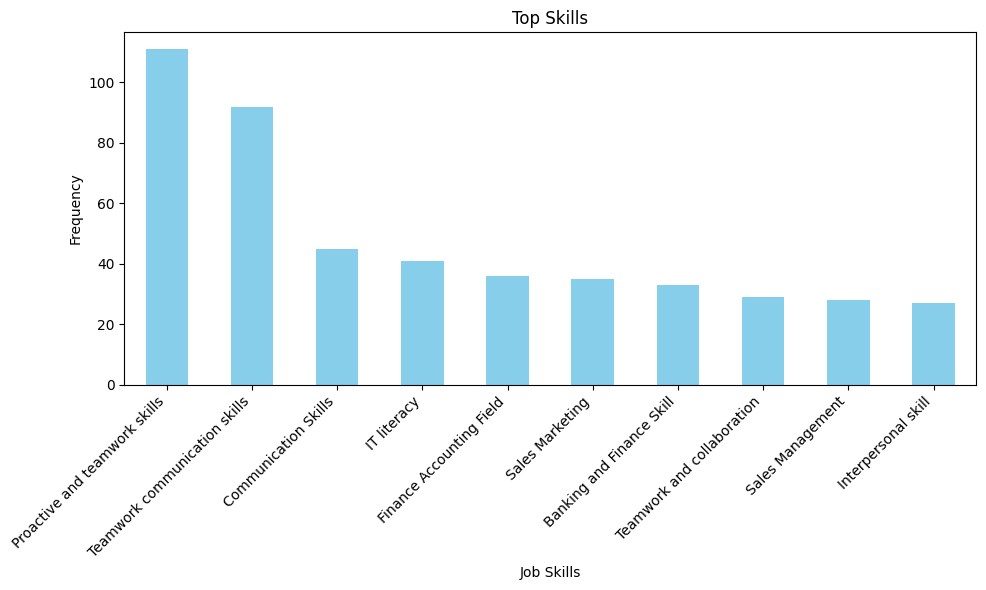

In [28]:
job_skills_counts = df['Job Skills'].value_counts()[:10]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
job_skills_counts.plot(kind='bar', color='skyblue')
plt.title('Top Skills')
plt.xlabel('Job Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [29]:
len(df['Title'].unique())

879

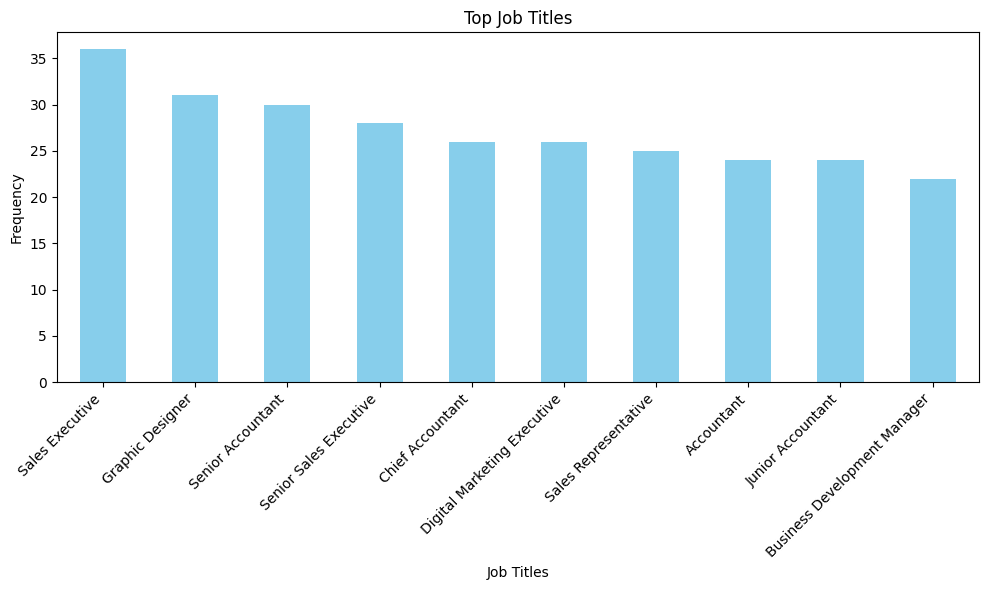

In [30]:
job_title_counts = df['Title'].value_counts()[:10]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
job_title_counts.plot(kind='bar', color='skyblue')
plt.title('Top Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [31]:
len(df['Industries'].unique())

26

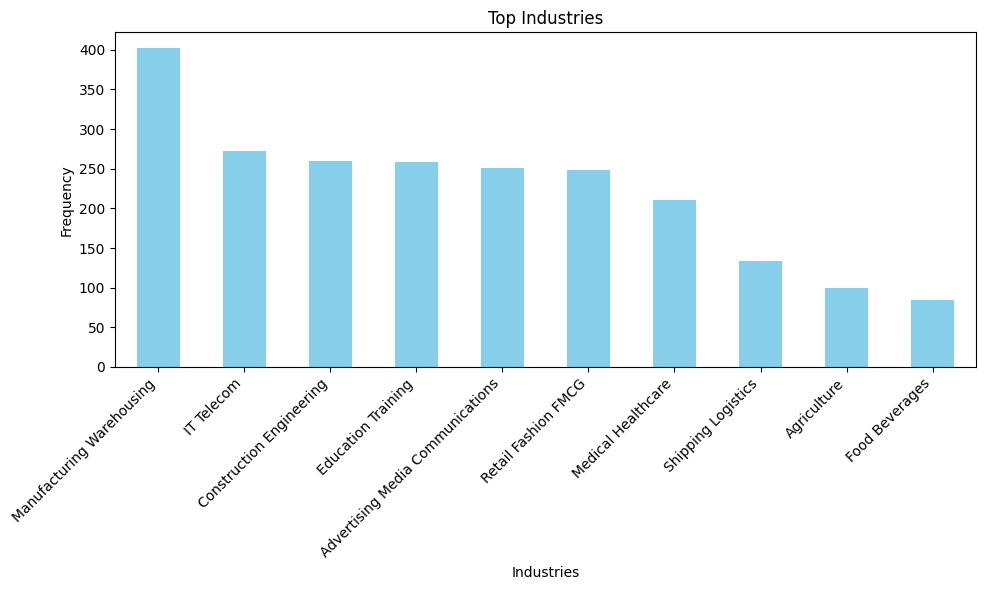

In [32]:
job_indust_counts = df['Industries'].value_counts()[:10]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
job_indust_counts.plot(kind='bar', color='skyblue')
plt.title('Top Industries')
plt.xlabel('Industries')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [33]:
df = df.groupby('Title').agg({
    'Industries': list,
    'Job Skills': list
}).reset_index()

df

,Title,Industries,Job Skills
0,,"[Hospitality Hotel, Recruitment, Retail Fashio...","[Native Chinese Myanmar languag, non experienc..."
1,A Level English Teacher Full Time Part Time,[Education Training],[Teaching sharing Knowledge]
2,A Level Maths Teacher Full Time Part Time,"[Education Training, Education Training, Educa...","[Teaching sharing Knowledge, Maths, Good at Math]"
3,Academic Coordinator Native Only,"[Education Training, Education Training, Educa...","[MS Office Applications, Handling Pressure, Tr..."
4,Account,[Medical Healthcare],[Accounting and Customer service]
...,...,...,...
874,property sale marketing supervisor,"[Property Real Estate, Property Real Estate, P...","[Supervisory skills, Customer Management, Sale..."
875,sale admin,"[Retail Fashion FMCG, Retail Fashion FMCG]","[Sales admin, Microsoft s]"
876,stock Controller and Purchaser,"[Retail Fashion FMCG, Retail Fashion FMCG]","[Proactive and teamwork skills, Quality Assura..."
877,test,[Government Public Relations],[Proactive and teamwork skills]


In [34]:
import re

' '.join(re.findall(r'[a-zA-Z]+', '消防队长fire chief'))

'fire chief'

In [35]:
df[df.Title == '']

,Title,Industries,Job Skills
0,,"[Hospitality Hotel, Recruitment, Retail Fashio...","[Native Chinese Myanmar languag, non experienc..."


In [36]:
df[df.Title == ' ']

,Title,Industries,Job Skills


In [37]:
df[df.Title != '']

,Title,Industries,Job Skills
1,A Level English Teacher Full Time Part Time,[Education Training],[Teaching sharing Knowledge]
2,A Level Maths Teacher Full Time Part Time,"[Education Training, Education Training, Educa...","[Teaching sharing Knowledge, Maths, Good at Math]"
3,Academic Coordinator Native Only,"[Education Training, Education Training, Educa...","[MS Office Applications, Handling Pressure, Tr..."
4,Account,[Medical Healthcare],[Accounting and Customer service]
5,Account Executive Finance Account,"[Advertising Media Communications, Advertising...","[Interpersonal skill, Positive Personality Att..."
...,...,...,...
874,property sale marketing supervisor,"[Property Real Estate, Property Real Estate, P...","[Supervisory skills, Customer Management, Sale..."
875,sale admin,"[Retail Fashion FMCG, Retail Fashion FMCG]","[Sales admin, Microsoft s]"
876,stock Controller and Purchaser,"[Retail Fashion FMCG, Retail Fashion FMCG]","[Proactive and teamwork skills, Quality Assura..."
877,test,[Government Public Relations],[Proactive and teamwork skills]


In [38]:
df = df[df.Title != '']
df

,Title,Industries,Job Skills
1,A Level English Teacher Full Time Part Time,[Education Training],[Teaching sharing Knowledge]
2,A Level Maths Teacher Full Time Part Time,"[Education Training, Education Training, Educa...","[Teaching sharing Knowledge, Maths, Good at Math]"
3,Academic Coordinator Native Only,"[Education Training, Education Training, Educa...","[MS Office Applications, Handling Pressure, Tr..."
4,Account,[Medical Healthcare],[Accounting and Customer service]
5,Account Executive Finance Account,"[Advertising Media Communications, Advertising...","[Interpersonal skill, Positive Personality Att..."
...,...,...,...
874,property sale marketing supervisor,"[Property Real Estate, Property Real Estate, P...","[Supervisory skills, Customer Management, Sale..."
875,sale admin,"[Retail Fashion FMCG, Retail Fashion FMCG]","[Sales admin, Microsoft s]"
876,stock Controller and Purchaser,"[Retail Fashion FMCG, Retail Fashion FMCG]","[Proactive and teamwork skills, Quality Assura..."
877,test,[Government Public Relations],[Proactive and teamwork skills]


In [39]:
# def make_description(row):
#     industries = ' and '.join(row['Industries'])
#     skills = ' and '.join(row['Job Skills'])     
#     return f"Industries: {industries}. Job Skills: {skills}."

In [40]:
# df['Description'] = df.apply(make_description, axis=1)
# df

In [41]:
df['Job Skills'] = df['Job Skills'].apply(lambda x : ' and '.join(x))
df

C:\Users\Phone Myint Naing\AppData\Local\Temp\ipykernel_13032\3757604238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Skills'] = df['Job Skills'].apply(lambda x : ' and '.join(x))


,Title,Industries,Job Skills
1,A Level English Teacher Full Time Part Time,[Education Training],Teaching sharing Knowledge
2,A Level Maths Teacher Full Time Part Time,"[Education Training, Education Training, Educa...",Teaching sharing Knowledge and Maths and Good ...
3,Academic Coordinator Native Only,"[Education Training, Education Training, Educa...",MS Office Applications and Handling Pressure a...
4,Account,[Medical Healthcare],Accounting and Customer service
5,Account Executive Finance Account,"[Advertising Media Communications, Advertising...",Interpersonal skill and Positive Personality A...
...,...,...,...
874,property sale marketing supervisor,"[Property Real Estate, Property Real Estate, P...",Supervisory skills and Customer Management and...
875,sale admin,"[Retail Fashion FMCG, Retail Fashion FMCG]",Sales admin and Microsoft s
876,stock Controller and Purchaser,"[Retail Fashion FMCG, Retail Fashion FMCG]",Proactive and teamwork skills and Quality Assu...
877,test,[Government Public Relations],Proactive and teamwork skills


In [42]:
df = df[~df.Title.str.contains('test', 'testing')]
df

,Title,Industries,Job Skills
1,A Level English Teacher Full Time Part Time,[Education Training],Teaching sharing Knowledge
2,A Level Maths Teacher Full Time Part Time,"[Education Training, Education Training, Educa...",Teaching sharing Knowledge and Maths and Good ...
3,Academic Coordinator Native Only,"[Education Training, Education Training, Educa...",MS Office Applications and Handling Pressure a...
4,Account,[Medical Healthcare],Accounting and Customer service
5,Account Executive Finance Account,"[Advertising Media Communications, Advertising...",Interpersonal skill and Positive Personality A...
...,...,...,...
872,kfg dfk pfkd g s fld,"[Manufacturing Warehousing, Manufacturing Ware...",IT literacy and Banking and Finance Skill and ...
873,office staff,"[Property Real Estate, Property Real Estate, P...",and Facebook other and Computer excel word in...
874,property sale marketing supervisor,"[Property Real Estate, Property Real Estate, P...",Supervisory skills and Customer Management and...
875,sale admin,"[Retail Fashion FMCG, Retail Fashion FMCG]",Sales admin and Microsoft s


In [50]:
df[df['Title'] == '']

,Title,Industries,Job Skills


In [51]:
df[df['Industries'] == '']

,Title,Industries,Job Skills


In [55]:
df[df['Job Skills'] == '']

,Title,Industries,Job Skills
15,Accountant Mandalay Female Posts,[Agriculture],
610,Sale Drive Male Post,[Manufacturing Warehousing],
653,Sales Drive Bayint Naung Insein Male Posts,[Manufacturing Warehousing],
865,Wheel Loader Driver,[Manufacturing Warehousing],


In [56]:
df = df[df['Job Skills'] != '']
df

,Title,Industries,Job Skills
1,A Level English Teacher Full Time Part Time,[Education Training],Teaching sharing Knowledge
2,A Level Maths Teacher Full Time Part Time,"[Education Training, Education Training, Educa...",Teaching sharing Knowledge and Maths and Good ...
3,Academic Coordinator Native Only,"[Education Training, Education Training, Educa...",MS Office Applications and Handling Pressure a...
4,Account,[Medical Healthcare],Accounting and Customer service
5,Account Executive Finance Account,"[Advertising Media Communications, Advertising...",Interpersonal skill and Positive Personality A...
...,...,...,...
872,kfg dfk pfkd g s fld,"[Manufacturing Warehousing, Manufacturing Ware...",IT literacy and Banking and Finance Skill and ...
873,office staff,"[Property Real Estate, Property Real Estate, P...",and Facebook other and Computer excel word in...
874,property sale marketing supervisor,"[Property Real Estate, Property Real Estate, P...",Supervisory skills and Customer Management and...
875,sale admin,"[Retail Fashion FMCG, Retail Fashion FMCG]",Sales admin and Microsoft s


In [57]:
df.to_csv('df_processed.csv', index=False)

# TextVectorizer + KNN

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('df_processed.csv')
df

,Title,Industries,Job Skills
0,A Level English Teacher Full Time Part Time,['Education Training'],Teaching sharing Knowledge
1,A Level Maths Teacher Full Time Part Time,"['Education Training', 'Education Training', '...",Teaching sharing Knowledge and Maths and Good ...
2,Academic Coordinator Native Only,"['Education Training', 'Education Training', '...",MS Office Applications and Handling Pressure a...
3,Account,['Medical Healthcare'],Accounting and Customer service
4,Account Executive Finance Account,"['Advertising Media Communications', 'Advertis...",Interpersonal skill and Positive Personality A...
...,...,...,...
867,kfg dfk pfkd g s fld,"['Manufacturing Warehousing', 'Manufacturing W...",IT literacy and Banking and Finance Skill and ...
868,office staff,"['Property Real Estate', 'Property Real Estate...",and Facebook other and Computer excel word in...
869,property sale marketing supervisor,"['Property Real Estate', 'Property Real Estate...",Supervisory skills and Customer Management and...
870,sale admin,"['Retail Fashion FMCG', 'Retail Fashion FMCG']",Sales admin and Microsoft s


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [3]:
skill_vectors = tf.fit_transform(df['Job Skills'])
skill_vectors

<872x827 sparse matrix of type '<class 'numpy.float64'>'
	with 6138 stored elements in Compressed Sparse Row format>

In [4]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(skill_vectors)

NearestNeighbors(metric='cosine')

In [5]:
query_vec = tf.transform(['Programming and Networking'])
distances, indices = knn.kneighbors(query_vec)
indices[0]

array([ 53, 351,  49, 519, 689], dtype=int64)

In [6]:
distances

array([[0.32346645, 0.37145561, 0.44101675, 0.67350153, 0.84575929]])

In [7]:
text_vectorizer_score = distances.mean()
text_vectorizer_score

0.531039924226869

In [8]:
df.iloc[indices[0]]

,Title,Industries,Job Skills
53,Area Sales Executive Post,"['Medical Healthcare', 'Medical Healthcare']",Networking Specializezd and Networking Special...
351,IT Support Associate EPS,['Travel Tourism Transportation'],Networking basic knowledge
49,Apprentice Technician,['IT Telecom'],PC Networking A Advanced
519,Presale Engineer,"['IT Telecom', 'IT Telecom', 'IT Telecom', 'IT...",IT literacy and Teamwork communication skills ...
689,Sales Representative,"['Shipping Logistics', 'Shipping Logistics', '...",Sales Marketing and Logistics and Shipping and...


In [9]:
for i in df.iloc[indices[0]]['Job Skills'].tolist():
    print(i)
    print()

Networking Specializezd and Networking Specializezd

Networking basic knowledge

PC Networking A Advanced

IT literacy and Teamwork communication skills and Work with patience and Networking Specializezd and IT literacy and Teamwork communication skills and Ability to work flexibly and Patient and honestly speaking

Sales Marketing and Logistics and Shipping and Sales Representative and Teamwork communication skills and Email internet and interpersonal skills and Marketing Management and Shipping Logistic and Communicative English and Driving Skill and Marketing and Coustomer Suport and Engineering Technology and Business Administration and Travel if necessary and  and Sales and Quick Learning and Able to travel and Self Driven Proactive and Sales and Sales and Distribution and Sales Marketing and Sale and Operation and Channel Sales B B B C and Trade Marketing and Trade Sales



# Sentence Transformer + KNN

In [10]:
import pandas as pd

df = pd.read_csv('df_processed.csv')
df

,Title,Industries,Job Skills
0,A Level English Teacher Full Time Part Time,['Education Training'],Teaching sharing Knowledge
1,A Level Maths Teacher Full Time Part Time,"['Education Training', 'Education Training', '...",Teaching sharing Knowledge and Maths and Good ...
2,Academic Coordinator Native Only,"['Education Training', 'Education Training', '...",MS Office Applications and Handling Pressure a...
3,Account,['Medical Healthcare'],Accounting and Customer service
4,Account Executive Finance Account,"['Advertising Media Communications', 'Advertis...",Interpersonal skill and Positive Personality A...
...,...,...,...
867,kfg dfk pfkd g s fld,"['Manufacturing Warehousing', 'Manufacturing W...",IT literacy and Banking and Finance Skill and ...
868,office staff,"['Property Real Estate', 'Property Real Estate...",and Facebook other and Computer excel word in...
869,property sale marketing supervisor,"['Property Real Estate', 'Property Real Estate...",Supervisory skills and Customer Management and...
870,sale admin,"['Retail Fashion FMCG', 'Retail Fashion FMCG']",Sales admin and Microsoft s


In [11]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [12]:
skill_embeddings = model.encode(df['Job Skills'].to_list())
skill_embeddings

array([[ 2.3709802e-02,  8.6277090e-03, -7.7955730e-02, ...,
         4.3593738e-02, -8.3347403e-02,  8.3566949e-02],
       [ 5.1501221e-03,  9.4180405e-03, -6.2236581e-02, ...,
        -1.8861288e-02, -9.0607271e-02,  7.1817130e-02],
       [-2.9127339e-02,  9.3189497e-03,  4.4940103e-02, ...,
         6.4354442e-02, -8.2585560e-03,  2.3546314e-03],
       ...,
       [-1.8880905e-04, -1.5708014e-02, -1.9677080e-02, ...,
         8.1699662e-02,  1.6626684e-02,  3.7788805e-03],
       [-2.5763787e-02, -3.4624148e-02, -5.7503134e-02, ...,
        -6.4112749e-03,  6.5591208e-05,  1.9586403e-02],
       [-7.6993242e-02,  2.2687616e-02, -3.4135446e-02, ...,
        -4.7666922e-02,  2.7493397e-02,  2.1484686e-02]], dtype=float32)

In [13]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(skill_embeddings)

NearestNeighbors(metric='cosine')

In [14]:
query_emb = model.encode(['Programming and Networking'])
distances, indices = knn.kneighbors(query_emb)
indices[0]

array([351,  49, 600,  87, 795], dtype=int64)

In [15]:
distances

array([[0.3191659 , 0.37865835, 0.45635784, 0.47077298, 0.49801326]],
      dtype=float32)

In [16]:
transformer_score = distances.mean()
transformer_score

0.42459363

In [17]:
df.iloc[indices[0]]

,Title,Industries,Job Skills
351,IT Support Associate EPS,['Travel Tourism Transportation'],Networking basic knowledge
49,Apprentice Technician,['IT Telecom'],PC Networking A Advanced
600,SCM Department Procurement Executive,['IT Telecom'],Telecom engineering
87,Assistant Service Engineer,"['Medical Healthcare', 'Medical Healthcare']",Computing Skills and Engineering
795,Superintendent Assistant Engineer Fiber Mandalay,['IT Telecom'],Telecommunication Industry


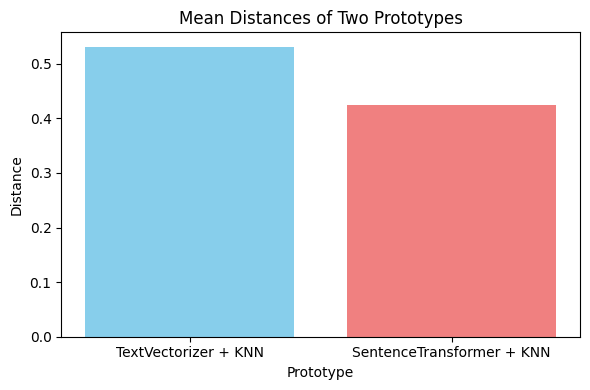

In [20]:
# Data for plotting
types = ['TextVectorizer + KNN', 'SentenceTransformer + KNN']
values = [text_vectorizer_score, transformer_score]

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(types, values, color=['skyblue', 'lightcoral'])

# Adding titles and labels
plt.title('Mean Distances of Two Prototypes')
plt.xlabel('Prototype')
plt.ylabel('Distance')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(knn, 'recommender_model')

# Inferencing

In [21]:
import joblib
from sentence_transformers import SentenceTransformer
import pandas as pd

In [22]:
transformer = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
recommender = joblib.load('recommender_model')
df = pd.read_csv('df_processed.csv')

In [23]:
query_emb = transformer.encode(['Programming and Networking'])
distances, indices = recommender.kneighbors(query_emb)
for job in df.iloc[indices[0]]['Title'].to_list():
    print(job)

IT Support Engineer
Architect
SEO specialist Marketing lead
Assistant Supply Chain
Supervisor Eng utility operation and maintenance


# Job Risk Model

In [25]:
import joblib
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd

In [26]:
df_risk = pd.read_csv('The_Future_of_Employment.csv', index_col=0)
df_risk

,Rank,Probability,Label,S OC code,Occupation
0,1,0.0028,NaN,29-1125,Recreational Therapists
1,2,0.0030,NaN,49-1011,"First-Line Supervisors of Mechanics, Installer..."
2,3,0.0030,NaN,11-9161,Emergency Management Directors
3,4,0.0031,NaN,21-1023,Mental Health and Substance Abuse Social Workers
4,5,0.0033,NaN,29-1181,Audiologists
...,...,...,...,...,...
697,698,0.9900,1.0,13-2053,Insurance Underwriters
698,699,0.9900,NaN,15-2091,Mathematical Technicians
699,700,0.9900,NaN,51-6051,"Sewers, Hand"
700,701,0.9900,NaN,23-2093,"Title Examiners, Abstractors, and Searchers"


In [27]:
df_risk = df_risk.filter(['Probability', 'Occupation'])
df_risk

,Probability,Occupation
0,0.0028,Recreational Therapists
1,0.0030,"First-Line Supervisors of Mechanics, Installer..."
2,0.0030,Emergency Management Directors
3,0.0031,Mental Health and Substance Abuse Social Workers
4,0.0033,Audiologists
...,...,...
697,0.9900,Insurance Underwriters
698,0.9900,Mathematical Technicians
699,0.9900,"Sewers, Hand"
700,0.9900,"Title Examiners, Abstractors, and Searchers"


In [28]:
len(df_risk.Occupation.unique())

702

In [29]:
transformer = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [30]:
job_embeddings = transformer.encode(df_risk['Occupation'].to_list())
job_embeddings

array([[ 0.00831579,  0.0144326 , -0.02067852, ...,  0.03443098,
         0.05469752,  0.02864441],
       [-0.0684939 , -0.04575565,  0.07772236, ...,  0.03543418,
         0.06204907,  0.01345262],
       [-0.02725162, -0.02817593,  0.01906146, ...,  0.01105912,
        -0.04190032, -0.02214719],
       ...,
       [-0.05339721, -0.0394942 ,  0.06192428, ...,  0.03780597,
         0.03890501,  0.07016228],
       [-0.06346763,  0.0876442 ,  0.03228281, ...,  0.06320131,
         0.06354354, -0.00763817],
       [-0.0719235 , -0.03796109,  0.01483214, ..., -0.04999978,
        -0.05217518,  0.04734157]], dtype=float32)

In [66]:
risk = KMeans(n_clusters=20, random_state=42)
risk.fit(job_embeddings)

C:\Users\Phone Myint Naing\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=20, random_state=42)

In [159]:
query_emb = transformer.encode(['Publican or manager of licensed premises'])
cluster = risk.predict(query_emb)[0]
cluster

4

In [160]:
centroids = risk.cluster_centers_
centroids

array([[-0.04791336,  0.0089616 ,  0.0193398 , ..., -0.01694294,
         0.04821382, -0.01574092],
       [-0.05305542,  0.03426651,  0.00484683, ..., -0.0119049 ,
        -0.00526937,  0.03677871],
       [-0.02911249,  0.03007006, -0.01541472, ...,  0.00431835,
         0.0632239 ,  0.02611992],
       ...,
       [-0.02243649,  0.00582929,  0.01608461, ..., -0.03991964,
         0.03255257,  0.01052563],
       [-0.05190769,  0.01153789,  0.01870316, ..., -0.02150898,
         0.03284418,  0.03046392],
       [-0.06263848, -0.00236557,  0.0051677 , ..., -0.03379221,
         0.04711142,  0.02098013]], dtype=float32)

In [161]:
labels = risk.labels_
labels

array([15,  6,  4, 15, 17, 15, 11, 15, 11,  6, 11,  4, 10,  0, 11,  8, 15,
        6, 11,  8, 17,  8, 11,  8, 15, 18, 10,  4,  5,  4, 11,  4,  4, 17,
       15, 11,  8,  4, 17,  8,  8, 11,  1,  8,  8, 11, 15,  8,  0, 10,  0,
        8,  0, 11, 17, 17,  4,  7,  4, 17,  4, 15,  0,  0,  6, 17,  4, 10,
       17,  4,  8, 10,  6,  9, 17,  8,  0,  4,  0, 17,  0, 10, 15,  0, 11,
       17, 17,  0, 10, 15, 10, 10, 10, 11, 10,  6,  8,  0, 17, 15, 15,  8,
        0,  0,  6,  0,  4,  0, 16,  4,  4,  8, 17, 15,  2, 10, 16,  4, 10,
        0,  4, 11, 10,  4, 17,  9, 17, 17,  0,  0, 10, 15, 10,  8, 17, 10,
        3,  1,  0, 10, 11, 15, 12, 11, 17, 16, 17,  4,  6, 15,  4,  4,  0,
        4, 10,  6,  6, 17,  6,  6, 10,  3,  7, 15,  4, 13,  6,  7,  3,  3,
        4,  0, 17,  0, 17, 10,  4, 16, 10,  0,  0,  4,  0,  4, 11,  8,  0,
       11,  0, 11,  8,  0,  0,  4, 16, 15,  5,  9,  6,  8,  4, 12, 18,  0,
        8, 11,  7,  4, 11,  5,  3,  0,  4,  0,  1, 16,  4,  0,  0,  4,  0,
       17,  0,  6,  0,  4

In [162]:
import numpy as np

In [163]:
np.mean(df_risk.iloc[np.where(labels == cluster)[0]]['Probability'])

0.30793333333333334

## Model Validation

C:\Users\Phone Myint Naing\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Phone Myint Naing\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Phone Myint Naing\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Phone Myint Naing\anaconda3\envs\torch\Lib\site-packages\s

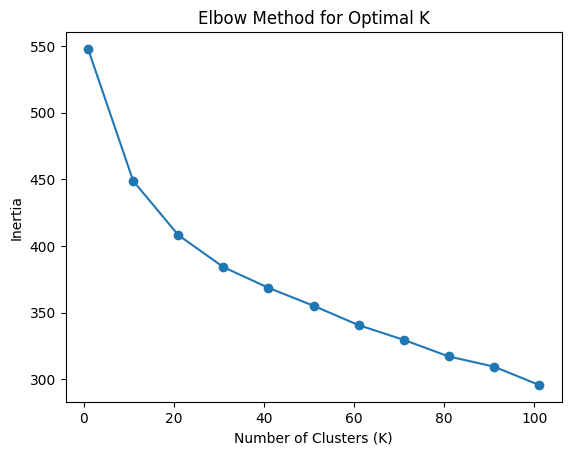

In [83]:
inertia = []
k_values = range(1, 102, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(job_embeddings)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Skill Risk Model

In [84]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [86]:
df_skill = pd.read_csv('O_Net_Variable.xlsx - Sheet1.csv')
df_skill

,omputerisation bottleneck,O∗NET Variable,O∗NET Description
0,Perception\nand\nManipulation,Finger\nDexterity,The ability to make precisely coordinated move...
1,Perception\nand\nManipulation,Manual\nDexterity,"The ability to quickly move your hand, your ha..."
2,Perception\nand\nManipulation,"Cramped Work Space,\nAwkward Positions\n",How often does this job require working in cra...
3,Creative\nIntelligence,Originality,The ability to come up with unusual or clever ...
4,Creative\nIntelligence,Fine Arts,Knowledge of theory and techniques required to...
5,Social\nIntelligence,Social\nPerceptiveness\n,Being aware of others’ reactions and understan...
6,Social\nIntelligence,Negotiation,Bringing others together and trying to reconc...
7,Social\nIntelligence,Persuasion,Persuading others to change their minds or beh...
8,Social\nIntelligence,Assisting and Caring for\nOthers,"Providing personal assistance, medical attenti..."


In [91]:
df_skill['O∗NET Description'][0].replace('\n', '')

'The ability to make precisely coordinated movements ofthe fingers of one or both hands to grasp, manipulate, orassemble very small objects.'

In [92]:
df_skill.columns = ['computerisation bottleneck', 'O∗NET Variable', 'O∗NET Description']
df_skill

,computerisation bottleneck,O∗NET Variable,O∗NET Description
0,Perception\nand\nManipulation,Finger\nDexterity,The ability to make precisely coordinated move...
1,Perception\nand\nManipulation,Manual\nDexterity,"The ability to quickly move your hand, your ha..."
2,Perception\nand\nManipulation,"Cramped Work Space,\nAwkward Positions\n",How often does this job require working in cra...
3,Creative\nIntelligence,Originality,The ability to come up with unusual or clever ...
4,Creative\nIntelligence,Fine Arts,Knowledge of theory and techniques required to...
5,Social\nIntelligence,Social\nPerceptiveness\n,Being aware of others’ reactions and understan...
6,Social\nIntelligence,Negotiation,Bringing others together and trying to reconc...
7,Social\nIntelligence,Persuasion,Persuading others to change their minds or beh...
8,Social\nIntelligence,Assisting and Caring for\nOthers,"Providing personal assistance, medical attenti..."


In [99]:
df_skill['computerisation bottleneck'] = df_skill['computerisation bottleneck'].str.replace('\n', ' ').str.strip()
df_skill['O∗NET Variable'] = df_skill['O∗NET Variable'].str.replace('\n', ' ').str.strip()
df_skill['O∗NET Description'] = df_skill['O∗NET Description'].str.replace('\n', ' ').str.strip()

In [100]:
df_skill['O∗NET Description'][0]

'The ability to make precisely coordinated movements of the fingers of one or both hands to grasp, manipulate, or assemble very small objects.'

In [101]:
onet_embeddings = transformer.encode(df_skill['O∗NET Description'].to_list())
onet_embeddings

array([[ 0.00083171, -0.05825182, -0.02447512, ...,  0.10275768,
        -0.03148564, -0.00540144],
       [-0.01278368, -0.00872662, -0.01041695, ...,  0.0787445 ,
        -0.04313663,  0.02473721],
       [ 0.02401254, -0.03589968,  0.05262559, ...,  0.05734231,
        -0.13550237, -0.00893797],
       ...,
       [-0.01740136,  0.05721264,  0.00343997, ...,  0.03637676,
         0.03570476,  0.0230088 ],
       [-0.01544721,  0.04605053,  0.00338642, ...,  0.08777461,
        -0.0791302 , -0.03261667],
       [-0.09199549,  0.04307619,  0.03158576, ...,  0.03779045,
         0.00093562, -0.01005511]], dtype=float32)

In [146]:
query_emb = transformer.encode([''])
query_emb

array([[-5.87729178e-02,  2.68683806e-02, -5.41339479e-02,
        -1.88484807e-02, -8.06555897e-02, -7.65786991e-02,
         6.80782795e-02,  6.81768358e-02, -6.16357140e-02,
         1.56452544e-02, -3.02620884e-02,  1.26424450e-02,
         7.36203790e-02, -5.96737899e-02, -9.05451365e-04,
         2.25527678e-02, -9.21425894e-02, -1.75673515e-02,
         5.16325794e-03, -1.18912935e-01, -4.38916869e-02,
        -5.63249141e-02, -1.07650198e-01, -2.84405500e-02,
         5.65141402e-02,  8.38068351e-02,  4.12888415e-02,
        -3.12528349e-02,  4.31470154e-03, -4.47076745e-02,
        -4.47068959e-02,  4.75436375e-02,  1.05945282e-01,
         8.02334249e-02, -2.01841351e-02,  5.42471111e-02,
        -2.63606571e-02, -5.34650944e-02, -3.70300226e-02,
        -8.35068803e-03, -1.38479158e-01,  5.79717457e-02,
         4.71957959e-02, -1.87507514e-02,  5.87612465e-02,
         1.15526924e-02, -4.22740132e-02,  7.00189080e-03,
        -3.13386209e-02,  5.75977610e-03, -8.58453959e-0

In [147]:
query_emb.shape

(1, 384)

In [148]:
onet_embeddings.shape

(9, 384)

In [149]:
for i in onet_embeddings:
    print(i.shape)

(384,)
(384,)
(384,)
(384,)
(384,)
(384,)
(384,)
(384,)
(384,)


In [150]:
onet.reshape((1, onet.shape[0])).shape

(1, 384)

In [151]:
similarity = list()
for onet in onet_embeddings:
    similarity.append(cosine_similarity(query_emb, onet.reshape((1, onet.shape[0]))))

In [152]:
similarity

[array([[0.23811541]], dtype=float32),
 array([[0.1810126]], dtype=float32),
 array([[0.18502541]], dtype=float32),
 array([[0.20156518]], dtype=float32),
 array([[0.16802508]], dtype=float32),
 array([[0.05289479]], dtype=float32),
 array([[0.04518278]], dtype=float32),
 array([[0.09934895]], dtype=float32),
 array([[0.07647184]], dtype=float32)]

In [153]:
np.argmax(similarity)

0

In [164]:
np.mean(similarity)

0.13862689